In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [7]:
#read data

data = pd.read_csv("Instagram data.csv", encoding="latin1")
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [9]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
data = data.apply(pd.to_numeric, errors='coerce')

In [13]:
data.isnull().sum()

Impressions         0
From Home           0
From Hashtags       0
From Explore        0
From Other          0
Saves               0
Comments            0
Shares              0
Likes               0
Profile Visits      0
Follows             0
Caption           119
Hashtags          119
dtype: int64

In [15]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("Instagram data.csv", encoding="latin1")

# Replace infinities and convert to numeric
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Handle missing values
data['Caption'].fillna('No caption', inplace=True)
data['Hashtags'].fillna('No hashtags', inplace=True)

# Verify changes
print(data.isnull().sum())


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_780\333956096.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Caption'].fillna('No caption', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_780\333956096.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No caption' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['Caption'].fillna('No caption', inplace=True)
C:\Users\Lenovo\AppD

In [17]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("Instagram data.csv", encoding="latin1")

# Replace infinities and convert to numeric
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Ensure columns are of type string before filling missing values
data['Caption'] = data['Caption'].astype(str)
data['Hashtags'] = data['Hashtags'].astype(str)

# Fill missing values without using inplace=True
data['Caption'] = data['Caption'].fillna('No caption')
data['Hashtags'] = data['Hashtags'].fillna('No hashtags')

# Verify changes
print(data.isnull().sum())


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [19]:
data=data.dropna()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


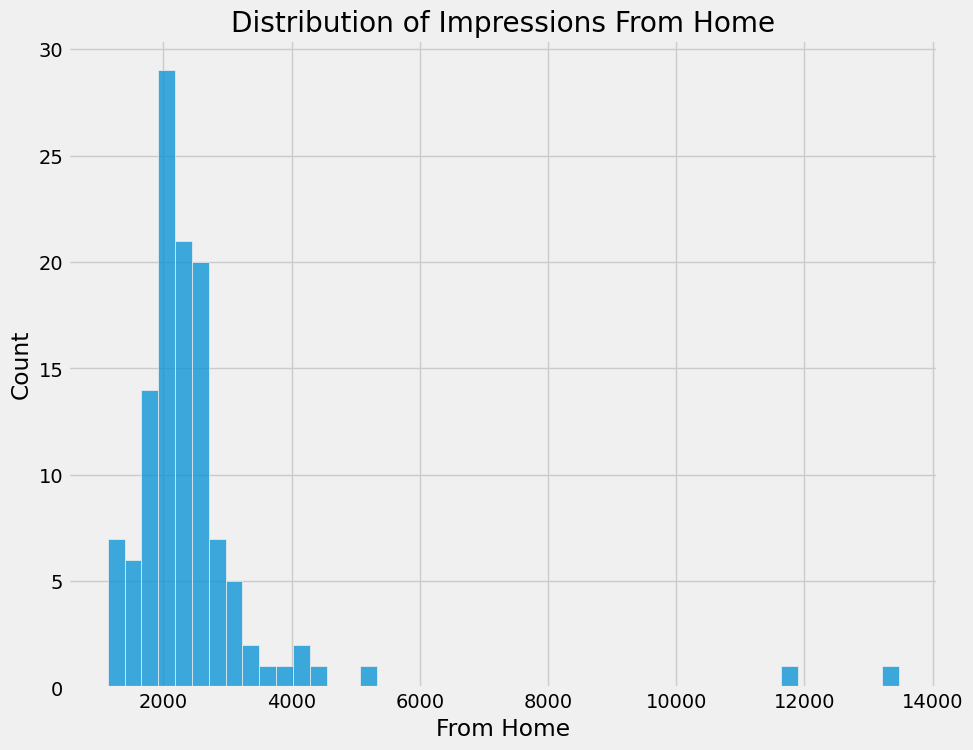

In [22]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'])
plt.show()

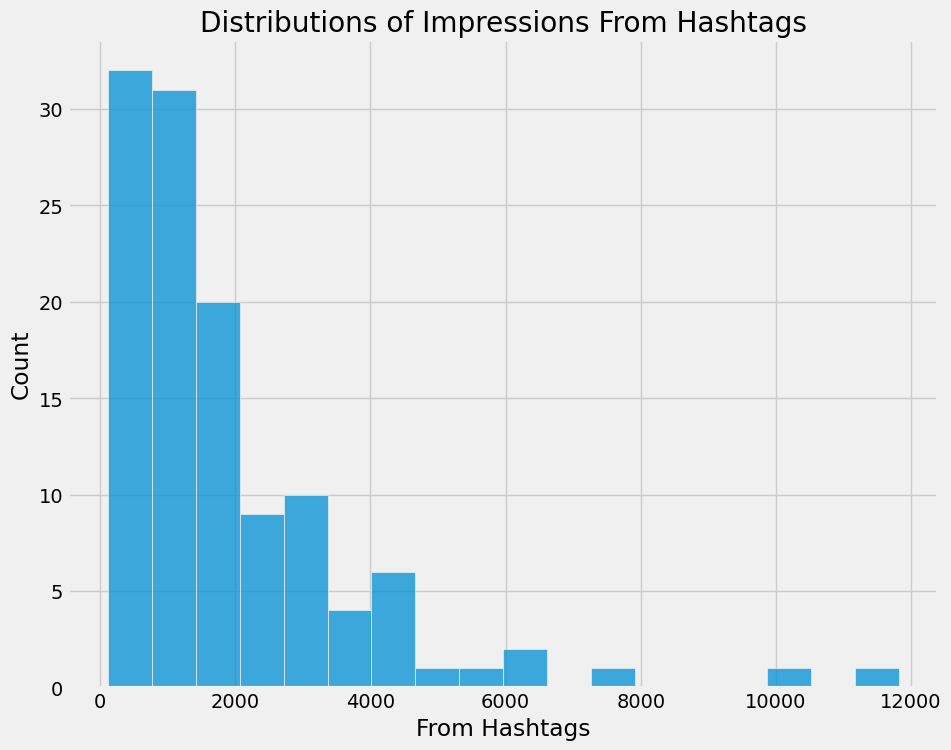

In [24]:
plt.figure(figsize=(10,8))
plt.title("Distributions of Impressions From Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

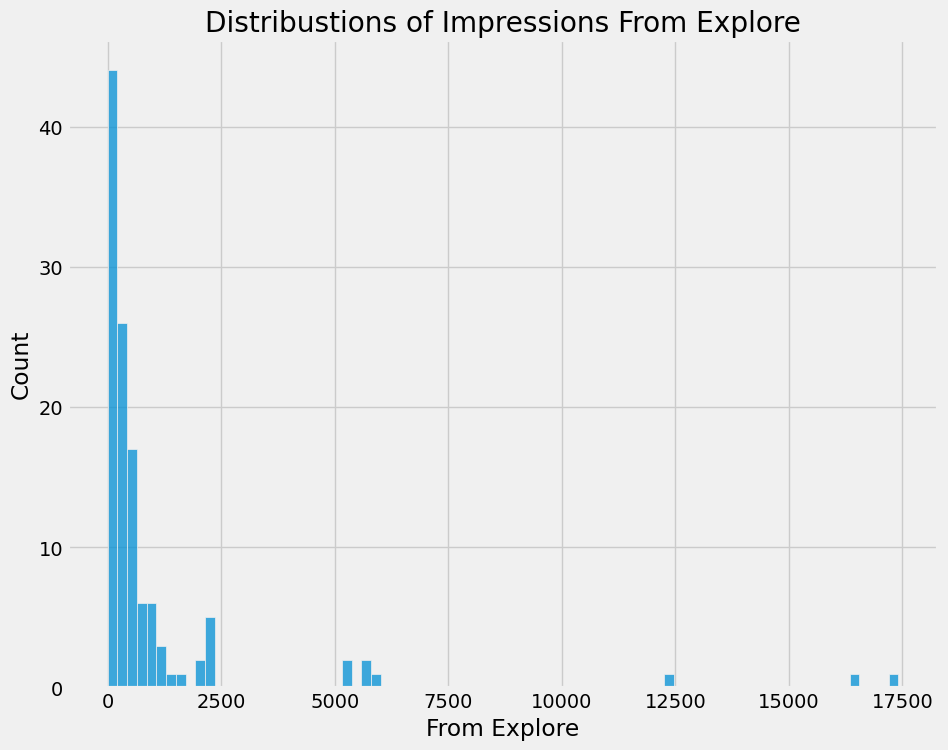

In [26]:
plt.figure(figsize=(10,8))
plt.title("Distribustions of Impressions From Explore")
sns.histplot(data['From Explore'])
plt.show()

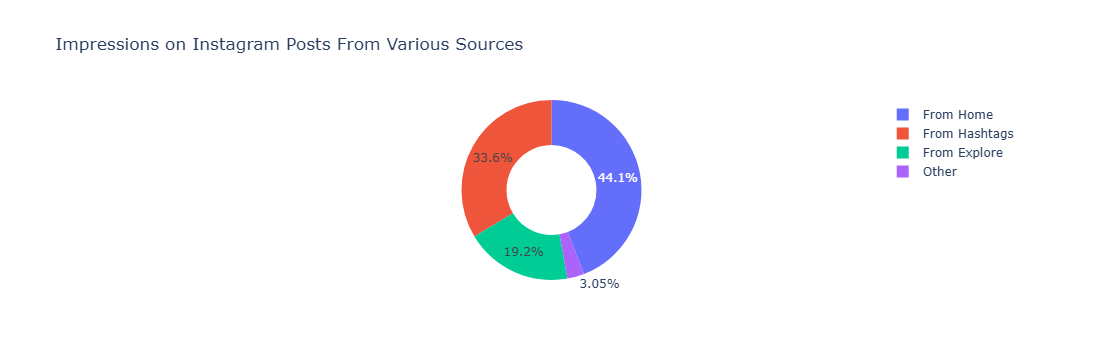

In [12]:

data = pd.read_csv("Instagram data.csv", encoding='latin1')  # or try 'ISO-8859-1', 'cp1252

# Calculate the sums
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

# Prepare the pie chart
labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()


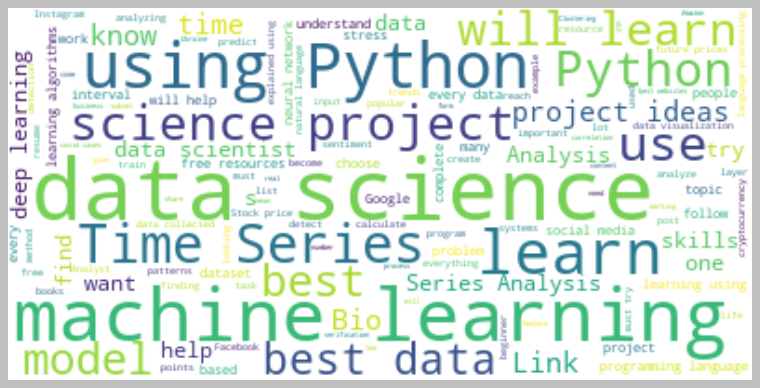

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Join all captions into a single text
text = " ".join(i for i in data.Caption)

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Plot the word cloud
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


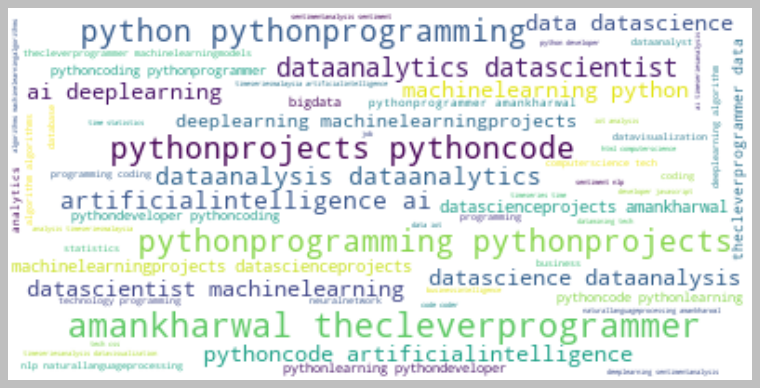

In [16]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


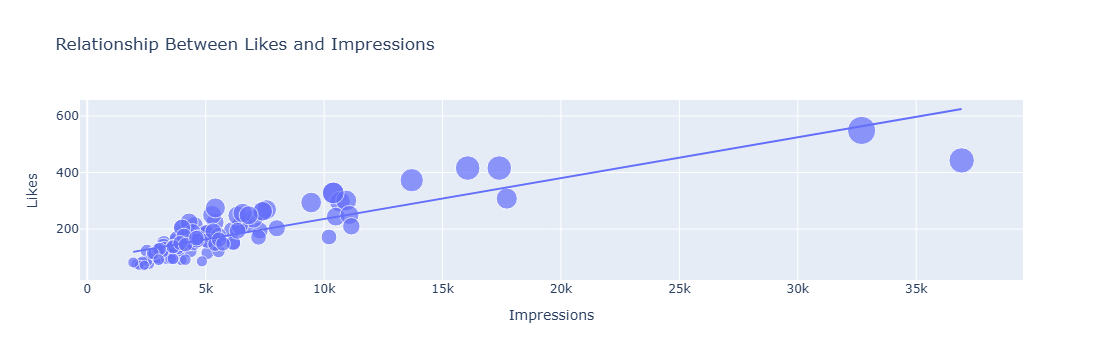

In [23]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title="Relationship Between Likes and Impressions")
figure.show()

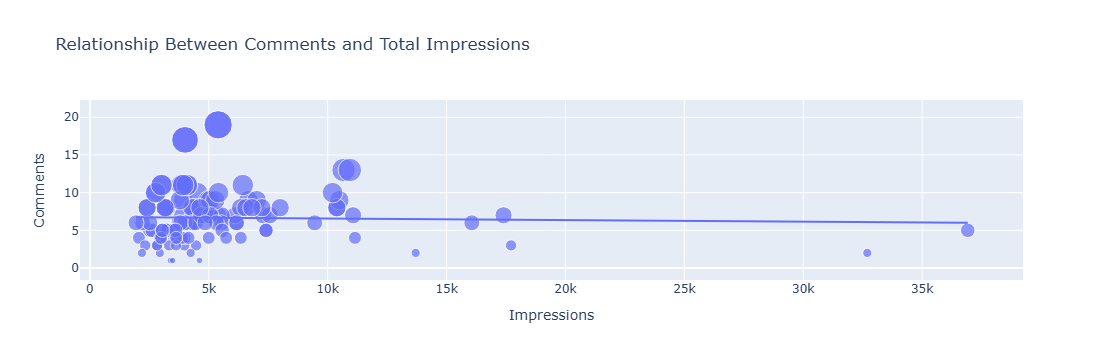

In [25]:
figure = px.scatter(data_frame =data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title="Relationship Between Comments and Total Impressions")
figure.show()

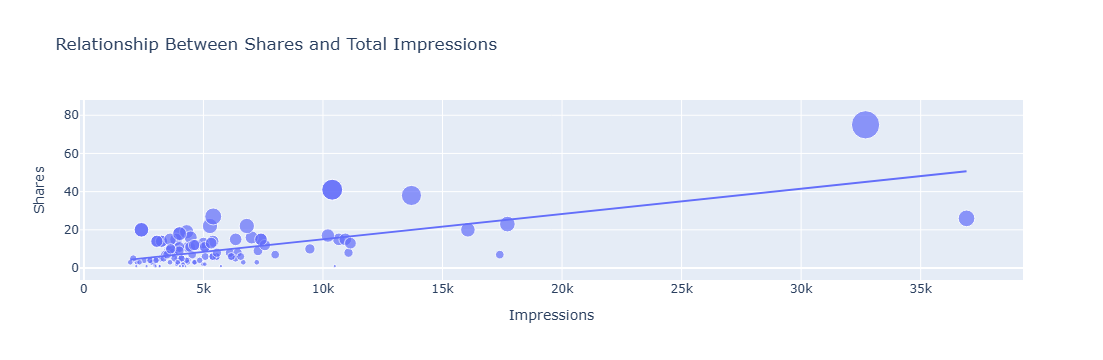

In [27]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

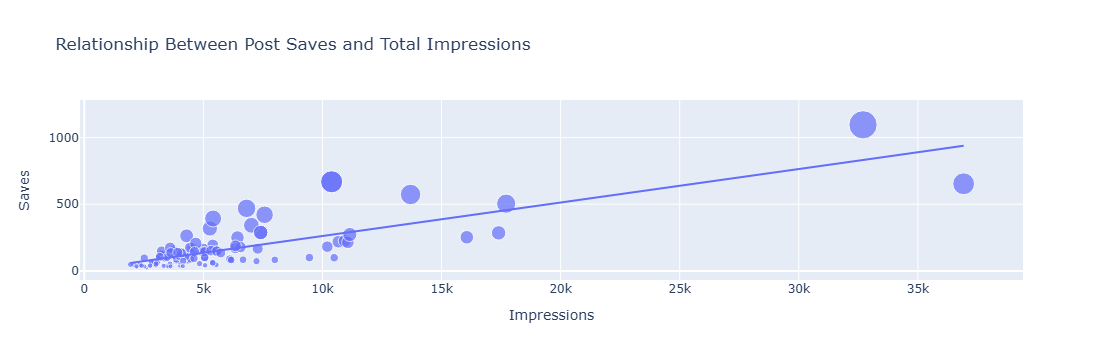

In [43]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [47]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import chardet

# Detect encoding
with open("Instagram data.csv", 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")

# Load the data with the detected encoding
data = pd.read_csv("Instagram data.csv", encoding=encoding)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])  # This will exclude non-numeric columns

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Print the correlations with 'Impressions'
if 'Impressions' in correlation.columns:
    print(correlation["Impressions"].sort_values(ascending=False))
else:
    print("The 'Impressions' column is not in the correlation matrix.")


Detected encoding: Windows-1252
Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [51]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


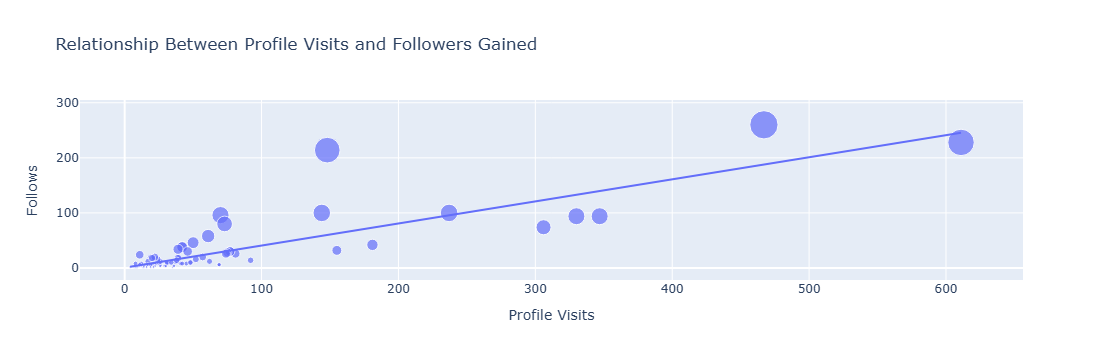

In [53]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title="Relationship Between Profile Visits and Followers Gained")
figure.show()

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
x = np.array(data[["Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"]])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import PassiveAggressiveRegressor

# Instantiate the model
model = PassiveAggressiveRegressor()

# Fit the model
model.fit(xtrain, ytrain)

# Evaluate the model
score = model.score(xtest, ytest)
print("Model R^2 score:", score)


Model R^2 score: 0.9205545176947809


In [68]:
#features = "Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])

In [72]:
model.predict(features)

array([11805.55689517])

In [74]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'data' is your DataFrame and it's already loaded and prepared

# Prepare the data
x = np.array(data[["Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"]])
y = np.array(data["Impressions"])

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)

# Make predictions
predictions = model.predict(xtest)

# Evaluate the model
score = model.score(xtest, ytest)
print("Model R^2 score:", score)

# Calculate additional metrics
mse = mean_squared_error(ytest, predictions)
mae = mean_absolute_error(ytest, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Model R^2 score: 0.8747406349693905
Mean Squared Error: 4864791.688275627
Mean Absolute Error: 1218.244622157593


In [74]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'data' is your DataFrame and it's already loaded and prepared

# Prepare the data
x = np.array(data[["Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"]])
y = np.array(data["Impressions"])

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)

# Make predictions
predictions = model.predict(xtest)

# Evaluate the model
score = model.score(xtest, ytest)
print("Model R^2 score:", score)

# Calculate additional metrics
mse = mean_squared_error(ytest, predictions)
mae = mean_absolute_error(ytest, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Model R^2 score: 0.8747406349693905
Mean Squared Error: 4864791.688275627
Mean Absolute Error: 1218.244622157593


In [74]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'data' is your DataFrame and it's already loaded and prepared

# Prepare the data
x = np.array(data[["Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"]])
y = np.array(data["Impressions"])

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)

# Make predictions
predictions = model.predict(xtest)

# Evaluate the model
score = model.score(xtest, ytest)
print("Model R^2 score:", score)

# Calculate additional metrics
mse = mean_squared_error(ytest, predictions)
mae = mean_absolute_error(ytest, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Model R^2 score: 0.8747406349693905
Mean Squared Error: 4864791.688275627
Mean Absolute Error: 1218.244622157593
